In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


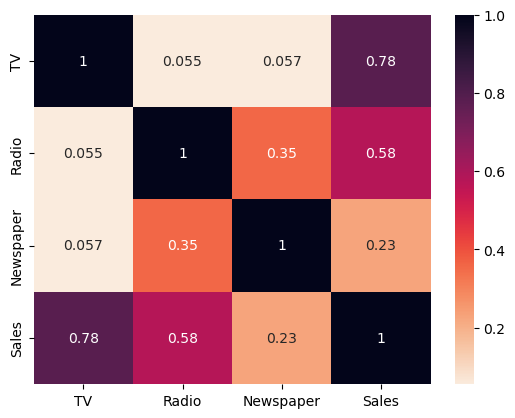

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='rocket_r');

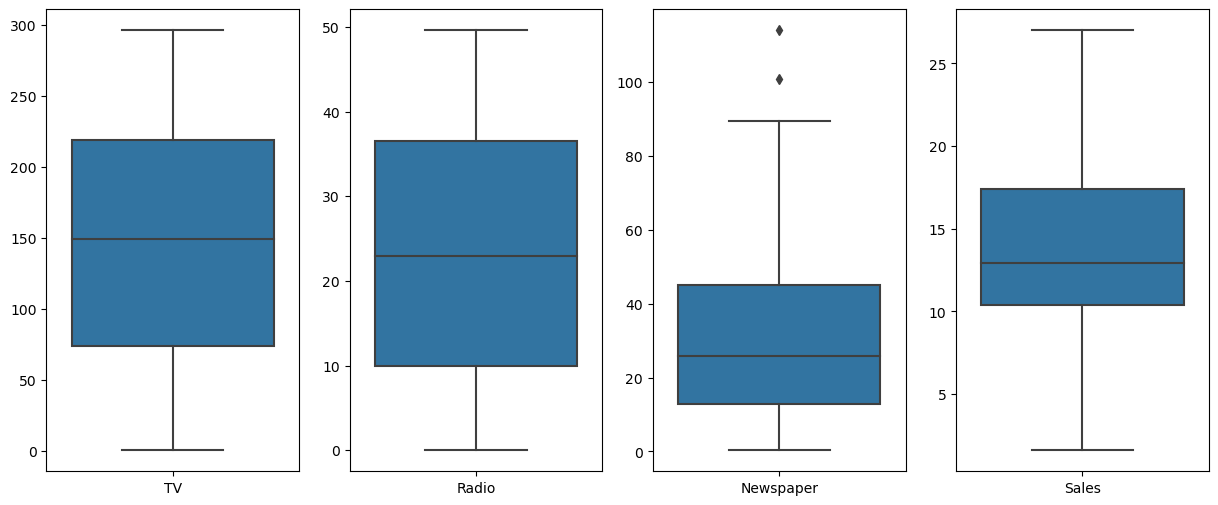

In [8]:
fig = plt.figure(figsize=(15,6))
for i, c in enumerate(df.columns, start=1):
    fig.add_subplot(140+i)
    sns.boxplot(df[[c]])

<Axes: >

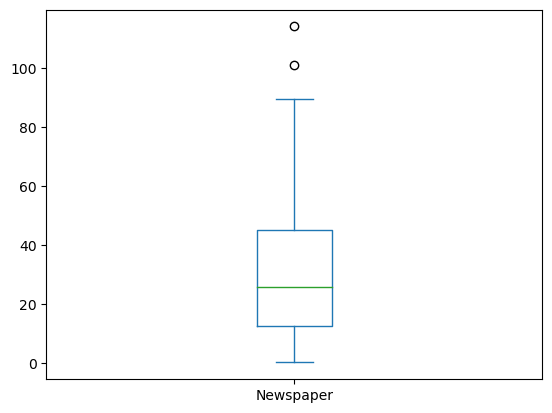

In [9]:
df.Newspaper.plot.box()

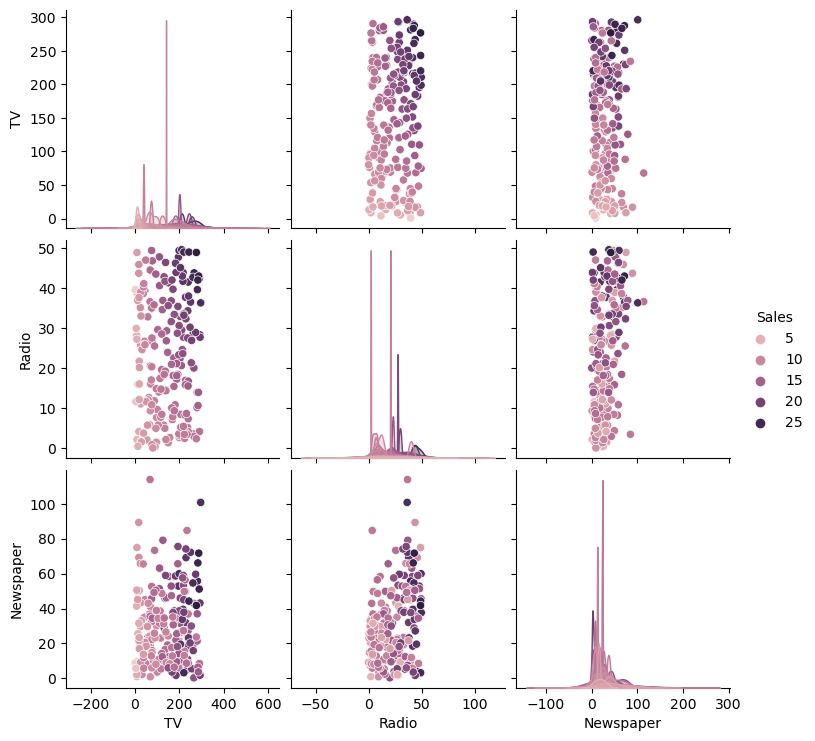

In [10]:
sns.pairplot(df, hue='Sales')

In [11]:
df.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [12]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df[['Sales']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
LR = LinearRegression()
R = Ridge()
L = Lasso()
ETR = ExtraTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor(n_neighbors=5)

models = {
    "LinearRegression": LR,
    "Ridge": R,
    "Lasso": L,
    "ExtraTreeRegressor": ETR,
    "GradientBoostingRegressor": GBR,
    "KNeighborsRegressor": KNN
}

In [54]:
def predict(x_train, y_train, x_test, y_test) -> pd.DataFrame:
    results = pd.DataFrame(columns=["Model", "R2_Score", "MSE", "RMSE"])
    for m in models.keys():
        y_pred = models.get(m).fit(x_train, y_train).predict(x_test)
        
        results = results.append({
            "Model": m,
            "R2_Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": mean_squared_error(y_test, y_pred)**0.5
        }, ignore_index=True)
    return results.sort_values('R2_Score', ascending=False).reset_index(drop=True)

In [55]:
predict(x_train, y_train, x_test, y_test)

,Model,R2_Score,MSE,RMSE
0,GradientBoostingRegressor,0.987387,0.373814,0.611403
1,ExtraTreeRegressor,0.957839,1.249500,1.117810
2,KNeighborsRegressor,0.914154,2.544190,1.595052
3,Lasso,0.907625,2.737691,1.654597
4,Ridge,0.906494,2.771195,1.664691
5,LinearRegression,0.906494,2.771202,1.664693


<Axes: >

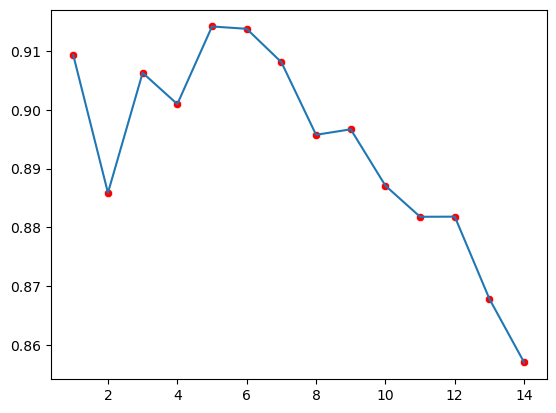

In [77]:
sns.scatterplot(x=range(1, 15), y=[r2_score(y_test, KNeighborsRegressor(n_neighbors=n).fit(x_train, y_train).predict(x_test)) for n in range(1, 15)], color='red')
sns.lineplot(x=range(1, 15), y=[r2_score(y_test, KNeighborsRegressor(n_neighbors=n).fit(x_train, y_train).predict(x_test)) for n in range(1, 15)])